<a href="https://colab.research.google.com/github/anafer25/Numerical-Differentiation-with-Fourth-Order-Finite-Difference/blob/main/4thOrderDifferenceMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This code numerically approximates the derivative of a function using a **fourth-order finite difference method ** and measures how the error changes as the step size decreases. It compares the numerical derivative of f(x)=x^6 at x=1 with the exact derivative and plots the error on a log-log scale. The straight line behavior confirms the expected 4th order accuracy.


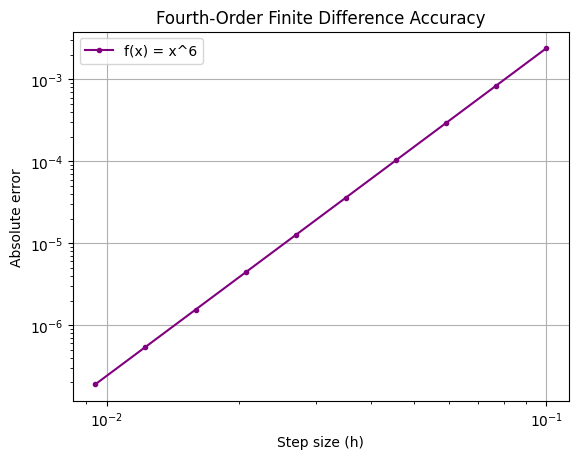

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# function whose derivative we want to approximate
def test_function(x):
    return x**6

# class for 4th-order finite difference derivative
class FiniteDifference:
    def __init__(self, func, step):
        self.func = func
        self.h = step  # public step size

    def derivative(self, x0):
        h = self.h
        return (
            self.func(x0 - 2*h)
            - 8*self.func(x0 - h)
            + 8*self.func(x0 + h)
            - self.func(x0 + 2*h)
        ) / (12*h)

# initial step size
h0 = 0.1

# arrays to store step sizes and errors
steps = np.zeros(10)
errors = np.zeros(10)

# create derivative calculator
diff_calc = FiniteDifference(test_function, h0)

# exact derivative at x = 1
exact_value = 6.0

# compute error for decreasing step sizes
for i in range(10):
    errors[i] = abs(diff_calc.derivative(1.0) - exact_value)
    steps[i] = diff_calc.h  # use the public attribute
    diff_calc.h /= 1.3      # shrink step size

# plot error vs step size on log-log axes
plt.plot(steps, errors, marker='.', color='purple', label='f(x) = x^6')
plt.xlabel('Step size (h)')
plt.ylabel('Absolute error')
plt.title('Fourth-Order Finite Difference Accuracy')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()
